In [2]:
import diffusion
import unet
import matplotlib.pyplot as plt
import numpy as np
import torch

# Noise scheduling
We use this to define our probabity distribution's continuous transition from noise to data, from $t=0$ to $t=1$
$$\mathcal{N}(\alpha z, \beta^2*I_d)$$
Where $z$ is a sample from our target distribution $P_{data}$ (image distribution) and $\alpha$ and $\beta$ defined in `diffusion.py`

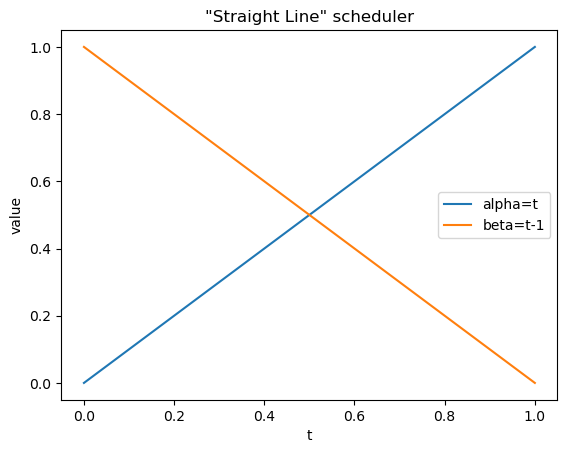

In [24]:
ns = diffusion.NoiseScheduler()

timesteps = 10
t = torch.tensor(np.linspace(0, 1, timesteps))

plt.title('"Straight Line" scheduler')
plt.xlabel('t')
plt.ylabel('value')
plt.plot(t, ns.alpha(t), label="alpha=t")
plt.plot(t, ns.beta(t), label="beta=t-1")
plt.legend()

# Learning Time Embeddings
For our U-Net that will be learning the score, we want to create embeddings for our $t \in [0,1]$. So that we can learn more complex time change dynamics. 
$$embedding =[sin(2\pi w_1 t), ..., cos(2\pi w_1 t), ...]$$

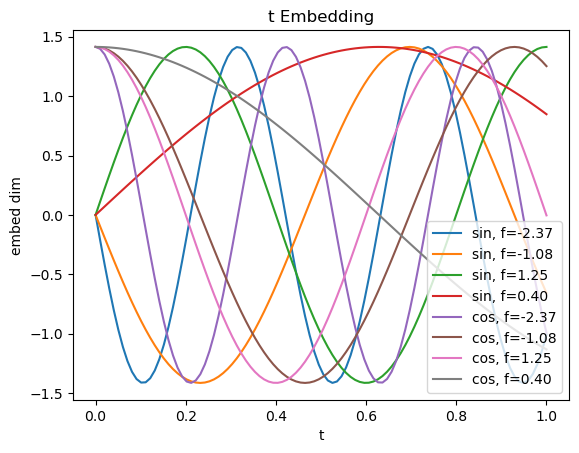

In [24]:
timesteps = 100
emb_dim = 8
temb = unet.TimeEmbedder(emb_dim)
t = torch.linspace(0, 1, timesteps).unsqueeze(0) # (bs, timestep)

embeddings = []
for i in range(timesteps):
    embeddings.append(temb.forward(t[:, i]))
embeddings = torch.stack(embeddings, dim=0).squeeze(1)

plt.title('t Embedding')
plt.xlabel('t')
plt.ylabel('embed dim')

freqs = temb.weights.squeeze(0)
for i in range(emb_dim):
    label = f'sin, f={freqs[i]:.2f}' if i < (emb_dim//2) else f'cos, f={freqs[i-(emb_dim//2)]:.2f}'
    plt.plot(t[0], embeddings[:, i].detach().numpy(), label=label)

plt.legend()